# Assignment: Evaluating Data from a Form

A client has been testing a [small form](index.html) to gather some basic data about their client-base. They have brought their findings to you to validate the data they have gathered. You can open the `index.html` page in a browser to take a look at the form.

You have been provided a [dataset of csv records](form.csv) that contain entries from the form as well as some basic visualizations.The client pointed out that some of the visualizations look incorrect but they're unsure about how to resolve them.

## Instructions

Use the techniques in this lesson to make recommendations about the form so it captures accurate and consistent information. 

In [ ]:
!pip install pandas
!pip install matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Loading the dataset
path = '../data/form.csv'
form_df = pd.read_csv(path)
print(form_df)

  birth_month       state   pet
0     January         NaN  Cats
1         JAN          CA  Cats
2        Sept      Hawaii   Dog
3     January          AK   Dog
4        July          RI  Cats
5   September  California  Cats
6       April          CA   Dog
7     January  California  Cats
8    November          FL   Dog
9    December     Florida  Cats


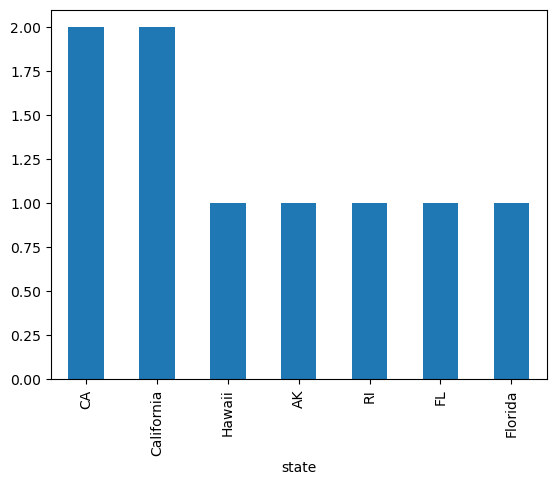

In [2]:
form_df['state'].value_counts().plot(kind='bar');
plt.show()

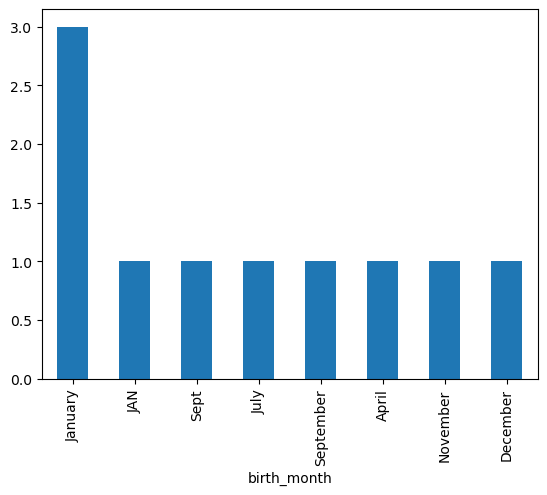

In [3]:
form_df['birth_month'].value_counts().plot(kind='bar');
plt.show()

## Solution

From the data exploration above, a number of issues are found:
* Missing value in the first row.
* Inconsistent formating in both the `birth_mont` and `state` columns, some entries are abbreviated while others are in full.

To clean this data, drop the row with the missing value using `dropna()`, change the values in `birth_month` into full month names, and change the values in `state` into abbreviations. Finally, identify and remove any duplicate.

In [4]:
# Drop rows with NaN values
form_df = form_df.dropna()
form_df

,birth_month,state,pet
1,JAN,CA,Cats
2,Sept,Hawaii,Dog
3,January,AK,Dog
4,July,RI,Cats
5,September,California,Cats
6,April,CA,Dog
7,January,California,Cats
8,November,FL,Dog
9,December,Florida,Cats


In [5]:
# Dictionary to map short month names to full names
month_mapping = {
    'JAN': 'January',
    'Sept': 'September',
}

# Replace short forms with full forms
form_df['birth_month'] = form_df['birth_month'].replace(month_mapping)
form_df

,birth_month,state,pet
1,January,CA,Cats
2,September,Hawaii,Dog
3,January,AK,Dog
4,July,RI,Cats
5,September,California,Cats
6,April,CA,Dog
7,January,California,Cats
8,November,FL,Dog
9,December,Florida,Cats


In [6]:
# Dictionary to map full state names to abbreviations
statw_mapping = {
    'California': 'CA',
    'Florida': 'FL',
    'Hawaii': 'HI'
}
# Replace full state names with abbreviations
form_df['state'] = form_df['state'].replace(statw_mapping)
form_df

,birth_month,state,pet
1,January,CA,Cats
2,September,HI,Dog
3,January,AK,Dog
4,July,RI,Cats
5,September,CA,Cats
6,April,CA,Dog
7,January,CA,Cats
8,November,FL,Dog
9,December,FL,Cats


In [7]:
# Identify duplicate entries
duplicates = form_df[form_df.duplicated()]
duplicates

,birth_month,state,pet
7,January,CA,Cats


In [8]:
# Remove duplicate entries
form_df = form_df.drop_duplicates()
form_df

,birth_month,state,pet
1,January,CA,Cats
2,September,HI,Dog
3,January,AK,Dog
4,July,RI,Cats
5,September,CA,Cats
6,April,CA,Dog
8,November,FL,Dog
9,December,FL,Cats


Let's visualize the data again to confirm our solution.

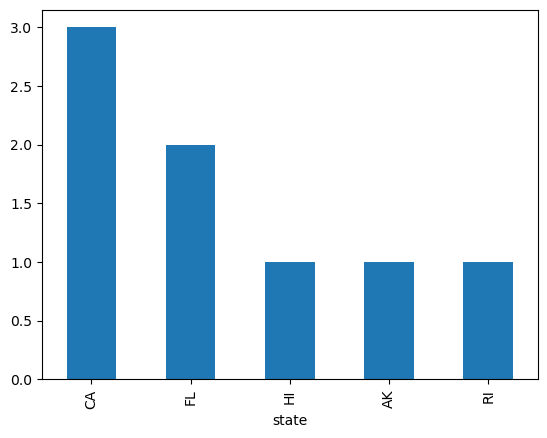

In [9]:
# Plot the cleaned data
form_df['state'].value_counts().plot(kind='bar');
plt.show()

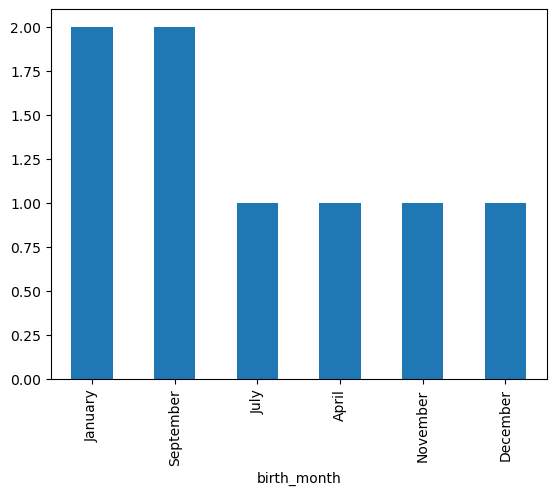

In [10]:
# Plot the birth_month data
form_df['birth_month'].value_counts().plot(kind='bar');
plt.show()